In [5]:
import pandas as pd
from helper_functions import *
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
occ_list = import_occupations('occupations_updated.csv')
occ_names = np.array(occ_list)[:,0]

In [7]:
she_p = []
he_p = []
ppbs = []
for occupation in occ_names:
    data = load_df('roberta-base', occupation, new=True)
    data['she_p'] = data['she'] / (data['she'] + data['he'])
    data['he_p'] = data['he'] / (data['she'] + data['he'])
    data['ppbs'] = data['he_p'] - data['she_p']
    she_p.append(data['she_p'].mean())
    he_p.append(data['he_p'].mean())
    ppbs.append(data['ppbs'].mean())

In [10]:
arr = np.array([occ_names, she_p, he_p, ppbs]).transpose()
occupation_data = pd.DataFrame(arr, columns=['occupation', 'she_p', 'he_p', 'ppbs'])
display(occupation_data)

,occupation,she_p,he_p,ppbs
0,registered_nurse,0.91901,0.08099,-0.83802
1,nurse,0.862286,0.137714,-0.724573
2,housekeeper,0.96028,0.03972,-0.920561
3,receptionist,0.715733,0.284267,-0.431466
4,fashion_designer,0.71706,0.28294,-0.43412
5,nanny,0.946288,0.053712,-0.892575
6,dancer,0.543536,0.456464,-0.087072
7,violinist,0.393275,0.606725,0.21345
8,singer,0.490363,0.509637,0.019274
9,sergeant,0.065802,0.934198,0.868396


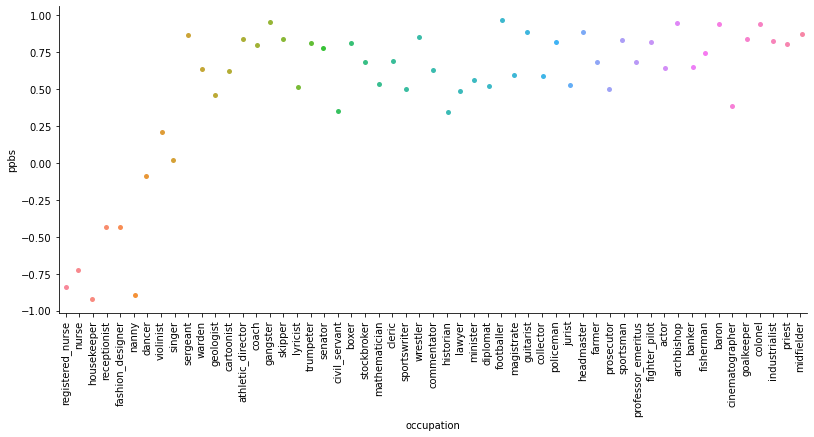

In [14]:
sns.catplot(data=occupation_data, x='occupation', y='ppbs', aspect=7/3)
plt.xticks(rotation=90)
plt.show()

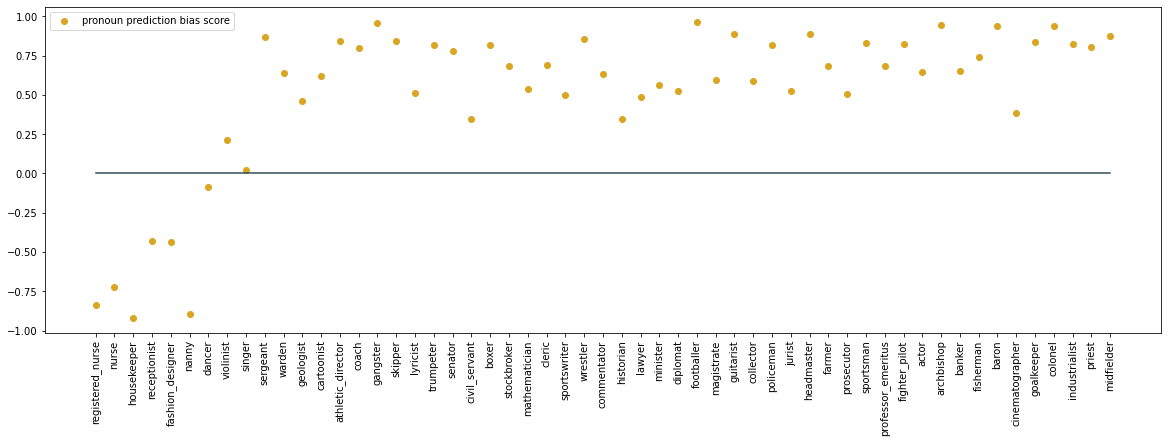

In [24]:
fig, ax = plt.subplots(figsize=(20,6))
#ax.scatter(occupation_data['occupation'], occupation_data['she_p'], label="female probability", color='indianred')
#ax.scatter(occupation_data['occupation'], occupation_data['he_p'], label="male probability", color='cornflowerblue')
ax.scatter(occupation_data['occupation'], occupation_data['ppbs'], label="pronoun prediction bias score", color='goldenrod')
ax.plot(occupation_data['occupation'], np.zeros_like(occupation_data['occupation']), color='darkslategrey')
ax.legend()
plt.xticks(rotation=90)
plt.show()

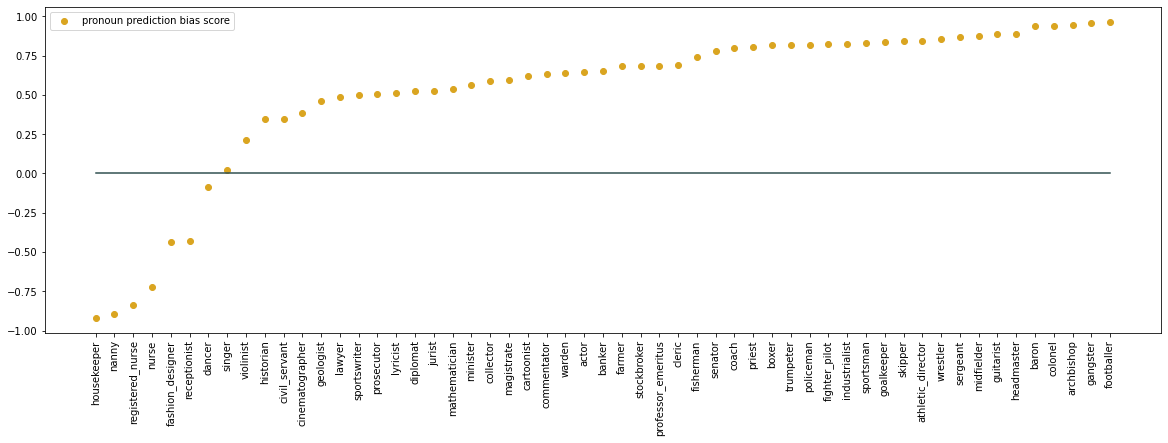

In [25]:
sorted = occupation_data.sort_values(by=['ppbs'])
fig, ax = plt.subplots(figsize=(20,6))
#ax.scatter(sorted['occupation'], sorted['she_p'], label="female probability", color='indianred')
#ax.scatter(sorted['occupation'], sorted['he_p'], label="male probability", color='cornflowerblue')
ax.scatter(sorted['occupation'], sorted['ppbs'], label="pronoun prediction bias score", color='goldenrod')
ax.plot(sorted['occupation'], np.zeros_like(sorted['occupation']), color='darkslategrey')
ax.legend()
plt.xticks(rotation=90)
plt.show()